In [11]:
import numpy as np
from skimage.io import imread,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


In [18]:
def plot(image):
    plt.imshow(image, cmap = 'gray')
    plt.show()

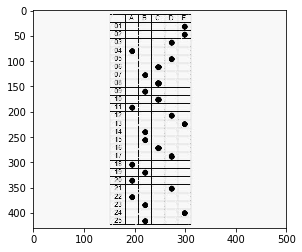

In [19]:
image = rgb2gray(imread('main.jpg'))
plot(image)

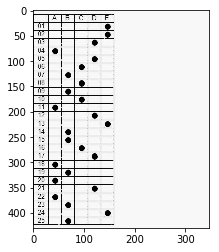

In [37]:
#------------------------------------------------------------------------
image = rgb2gray(imread('main.jpg'))

onde = {}
kem  = image[0][0]

for posix , x in enumerate(range(image.shape[0])):
    for y in range(image.shape[1]):
        if image[x][y] < 0.5:
            onde[posix] = ({"value: " : image[x][y], "x": x, "y": y})
            break
plot(image[:,152:])

#------------------------------------------------------------------------

In [35]:
onde

{8: {'value: ': 0.06274509803921569, 'x': 8, 'y': 152},
 9: {'value: ': 0.0392156862745098, 'x': 9, 'y': 152},
 10: {'value: ': 0.04313725490196079, 'x': 10, 'y': 152},
 11: {'value: ': 0.054901960784313725, 'x': 11, 'y': 152},
 12: {'value: ': 0.047058823529411764, 'x': 12, 'y': 152},
 13: {'value: ': 0.0392156862745098, 'x': 13, 'y': 152},
 14: {'value: ': 0.06274509803921569, 'x': 14, 'y': 152},
 15: {'value: ': 0.050980392156862744, 'x': 15, 'y': 152},
 16: {'value: ': 0.047058823529411764, 'x': 16, 'y': 152},
 17: {'value: ': 0.047058823529411764, 'x': 17, 'y': 152},
 18: {'value: ': 0.058823529411764705, 'x': 18, 'y': 152},
 19: {'value: ': 0.058823529411764705, 'x': 19, 'y': 152},
 20: {'value: ': 0.054901960784313725, 'x': 20, 'y': 152},
 21: {'value: ': 0.07058823529411766, 'x': 21, 'y': 152},
 22: {'value: ': 0.06274509803921569, 'x': 22, 'y': 152},
 23: {'value: ': 0.027450980392156862, 'x': 23, 'y': 152},
 24: {'value: ': 0.03137254901960784, 'x': 24, 'y': 152},
 25: {'valu

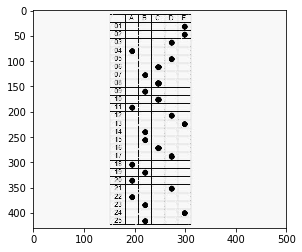

In [36]:
plot(image)

In [33]:
print(image.max())
print(image.min())
print(image.mean())
print(image.std())

0.9921568627450981
0.0
0.9139526128572731
0.19694465940347367


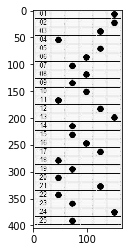

In [75]:
plt.imshow(image[25:,149:314], cmap = 'gray')

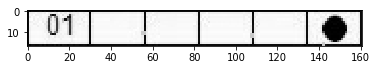

In [76]:
lines = image[24:,152:313]
plt.imshow(lines[:17,:], cmap = 'gray')

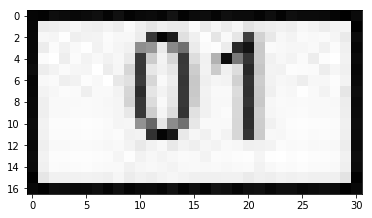

In [77]:
lines = image[24:,152:313]
plt.imshow(lines[:17,:31], cmap = 'gray')

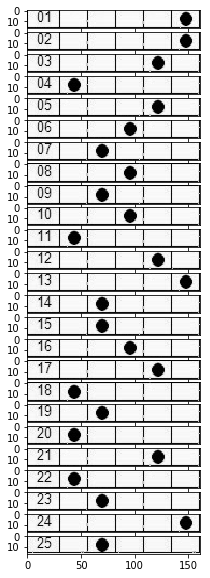

In [78]:
dims = image.shape

fig, ax = plt.subplots(25, 1, figsize = (25, 10), sharex = True)
count = 0;
for position in range(25):
    ax[position].imshow(lines[count:count + 17, :], cmap = 'gray')
    count += 16 #Tamanho de cada linhas(retângulo)
    

In [81]:
dims = image.shape

def respostaMarcada(resp):
    
    alts = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
    }
    
    for k, x in enumerate(resp):
        letra = x.index(min(x))
        print(k + 1, alts[letra])


def options():
    #fig, ax = plt.subplots(1, 5, figsize = (25, 10), sharex = True)
    count = 0;
    count2 = 30

    resp = []
    
    for __ in range(25):
        
        data = lines[count: count + 17, :]
        opts = []
        
        for posix in range(5):
            #plt.imshow(data, cmap ='gray')
            opts.append(data[:, count2: count2 + 30].sum())
            #ax[posix].imshow(data, cmap = 'gray')
            count2 += 26
        resp.append(opts)
        count2 = 30
        count += 16
        
    respostaMarcada(resp)

options()

1 E
2 E
3 D
4 A
5 D
6 C
7 B
8 C
9 B
10 C
11 A
12 D
13 E
14 B
15 B
16 C
17 D
18 A
19 B
20 A
21 D
22 A
23 B
24 E
25 B


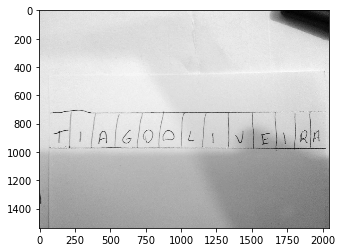

In [80]:
img = rgb2gray(imread('nome.jpg'))
plt.imshow(img, cmap = 'gray')